In [1]:
import pandas as pd
import xlrd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn . linear_model import LogisticRegression
from sklearn . preprocessing import StandardScaler , LabelEncoder, OneHotEncoder
from sklearn . model_selection import train_test_split, GridSearchCV
from sklearn . metrics import confusion_matrix
from sklearn . naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn . ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn . neighbors import KNeighborsClassifier
from sklearn . discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn . discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn . ensemble import AdaBoostClassifier
from sklearn . cluster import KMeans
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('predictive_maintenance.csv')

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
df.shape

(10000, 10)

In [6]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

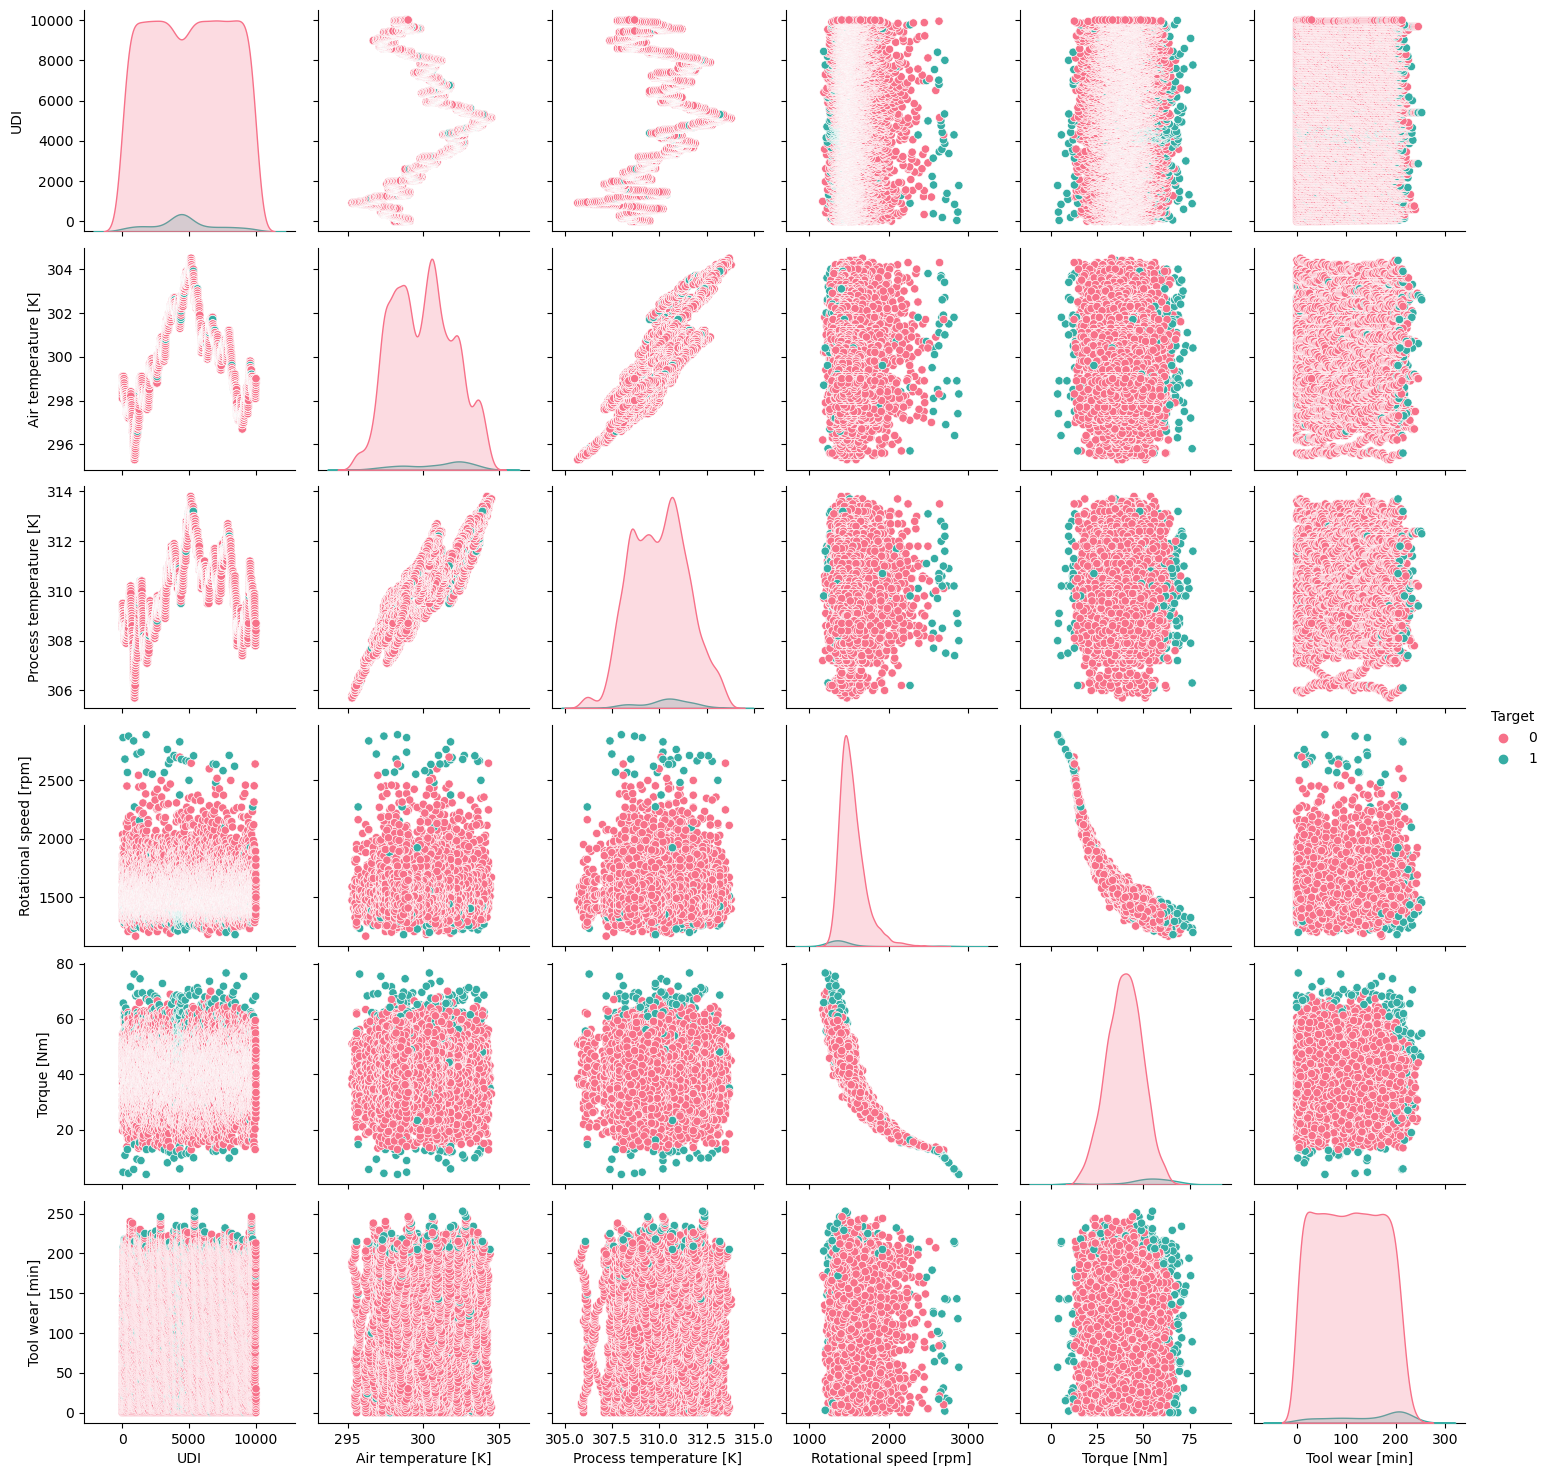

In [7]:
pairplot=sns.pairplot(df,hue="Target",palette="husl")
plt.show()

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Air temperature [K]', 'Process temperature [K]', 
                                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']),
        ('cat', OneHotEncoder(), ['Type'])
    ])

In [9]:
X=df[['Type', 'Air temperature [K]', 'Process temperature [K]', 
                                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
Y=df['Target']

In [10]:
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,test_size =0.5,random_state=3)

In [11]:
X_train_2=X_train.drop('Type', axis=1)

In [12]:
X_test_2=X_test.drop('Type', axis=1)

In [13]:
#from imblearn.under_sampling import RandomUnderSampler
#rus = RandomUnderSampler(random_state=0)
#cc = ClusterCentroids(random_state=0)
#X_resampled, y_resampled = rus.fit_resample(X, y)

Use if it is undersampled.

# Random Forest Model

In [14]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=3))
])

In [15]:
#param_grid = {
#    'classifier__n_estimators': [100, 200, 300, 400, 500, 600],
#    'classifier__max_depth': [None, 10, 20, 30, 40],
#    'classifier__min_samples_split': [2,3,4,5,6,7,8,9,10,11],
#    'classifier__min_samples_leaf': [1, 5, 10],
#    'classifier__max_features': ['auto', 'sqrt', 'log2', 0.3, 30]
#}

In [16]:
#grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [17]:
#grid_search.fit(X_train, Y_train)

In [18]:
#best_model = grid_search.best_estimator_
#best_model.predict(X_test)

The above code is used to find the best parameters of Random Forest Model, but it takes too much time to compute. Thus, I decided to leave the code here.

In [19]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Type'])])),
                ('classifier', RandomForestClassifier(random_state=3))])

In [20]:
prediction_RF=pipeline.predict(X_test)
accuracy_RF=np.mean(Y_test==prediction_RF)
accuracy_RF

0.9834

In [21]:
cf_RF=confusion_matrix(Y_test, prediction_RF, labels=[0,1])
cf_RF

array([[4824,   13],
       [  70,   93]], dtype=int64)

In [22]:
rf_model = pipeline.named_steps['classifier']
feature_importances = rf_model.feature_importances_

In [23]:
feature_imp_df_RF=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_RF=feature_imp_df_RF.sort_values(by=0,ascending=False)
feature_imp_df_RF = feature_imp_df_RF.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_RF

,Feature_importance,Column_Name
3,0.315828,Rotational speed [rpm]
2,0.224035,Process temperature [K]
4,0.157056,Torque [Nm]
0,0.151477,Type
1,0.127611,Air temperature [K]
5,0.005034,Tool wear [min]


# SVM 

In [24]:
svm_classifier = svm.SVC()

In [25]:
preprocessor_SVM = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Air temperature [K]', 'Process temperature [K]', 
                                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
        #('cat', OneHotEncoder(), ['Type'])
    ])

I decided to drop it here since categorical input here does not make sense

In [26]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_SVM),
    ('classifier', svm_classifier)
])

In [27]:
param_grid = {
    'classifier__C': [10, 100], #'classifier__C': [0.1, 1, 10, 100] I have deleted some parameters to save computation time
    'classifier__gamma': [1, 0.1], #'classifier__gamma': [1, 0.1, 0.01, 0.001] 
    'classifier__kernel': ['rbf'] #   'classifier__kernel': ['rbf', 'poly', 'linear']
}

In [28]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [29]:
grid_search.fit(X_train_2, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [30]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf'}


In [31]:
best_model = grid_search.best_estimator_
prediction_rbf=best_model.predict(X_test_2)
accuracy_rbf=np.mean(Y_test==prediction_rbf)
accuracy_rbf

0.9818

In [32]:
cf_SVM=confusion_matrix(Y_test, prediction_rbf, labels=[0,1])
cf_SVM

array([[4819,   18],
       [  73,   90]], dtype=int64)

# Logistic Regression

In [33]:
log_reg_classifier = LogisticRegression(max_iter=1000)

In [34]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_reg_classifier)
])

In [35]:
param_grid = {
    'classifier__C': [0.1, 1, 10, 100], #small value indicate strong regularization
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [36]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [37]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [38]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [39]:
best_model = grid_search.best_estimator_
prediction_LR=best_model.predict(X_test)
accuracy_LR=np.mean(Y_test==prediction_LR)
accuracy_LR

0.9712

In [40]:
cf_LR=confusion_matrix(Y_test, prediction_LR, labels=[0,1])
cf_LR

array([[4826,   11],
       [ 133,   30]], dtype=int64)

In [41]:
LR_model = best_model.named_steps['classifier']
feature_importances = LR_model.coef_[0]

In [42]:
feature_imp_df_LG=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_LG=feature_imp_df_LG.sort_values(by=0,ascending=False)
feature_imp_df_LG = feature_imp_df_LG.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_LG

,Feature_importance,Column_Name
3,2.561496,Rotational speed [rpm]
2,1.869376,Process temperature [K]
0,1.516970,Type
4,0.698144,Torque [Nm]
1,-1.007482,Air temperature [K]
5,-1.517753,Tool wear [min]


# Decision Tree Model

In [43]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=3)

In [44]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

In [45]:
param_grid = {
    'classifier__max_depth': [10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2', None]
}

In [46]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [47]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [48]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__max_depth': 10, 'classifier__max_features': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}


In [49]:
best_model = grid_search.best_estimator_
prediction_DT=best_model.predict(X_test)
accuracy_DT=np.mean(Y_test==prediction_DT)
accuracy_DT

0.979

In [50]:
cf_DT=confusion_matrix(Y_test, prediction_DT, labels=[0,1])
cf_DT

array([[4795,   42],
       [  63,  100]], dtype=int64)

In [51]:
DT_model = best_model.named_steps['classifier']
feature_importances = DT_model.feature_importances_

In [52]:
feature_imp_df_DT=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_DT=feature_imp_df_DT.sort_values(by=0,ascending=False)
feature_imp_df_DT = feature_imp_df_DT.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_DT

,Feature_importance,Column_Name
3,0.355000,Rotational speed [rpm]
2,0.215186,Process temperature [K]
0,0.173404,Type
4,0.165643,Torque [Nm]
1,0.076562,Air temperature [K]
5,0.000000,Tool wear [min]


# k-NN Model

In [53]:
knn_classifier=KNeighborsClassifier()

In [54]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Air temperature [K]', 'Process temperature [K]', 
                                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
        #('cat', OneHotEncoder(), ['Type'])
    ])

I decided to drop the categorical input column since it does not make sense in distance metrics.

In [55]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', knn_classifier)
])

In [56]:
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'hamming']
#    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#    'leaf_size': [20, 30, 40]
}

In [57]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [58]:
grid_search.fit(X_train_2, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [59]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 13, 'classifier__weights': 'distance'}


In [60]:
best_model = grid_search.best_estimator_
prediction_KNN=best_model.predict(X_test_2)
accuracy_KNN=np.mean(Y_test==prediction_KNN)
accuracy_KNN

0.9708

In [61]:
cf_KNN=confusion_matrix(Y_test, prediction_KNN, labels=[0,1])
cf_KNN

array([[4827,   10],
       [ 136,   27]], dtype=int64)

# Linear Discriminant Analysis

In [62]:
lda_classifier = LDA()

In [63]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lda_classifier)
])

In [64]:
param_grid = {
    'classifier__solver': ['svd', 'lsqr', 'eigen'],
    'classifier__shrinkage': [None, 'auto', 0.2, 0.4,0.6,0.8], # the sample covariance matrix is adjusted towards target matrix
    'classifier__n_components': [1, 2, 4, 5, 10]
}

In [65]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [66]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [67]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__n_components': 1, 'classifier__shrinkage': 'auto', 'classifier__solver': 'lsqr'}


In [68]:
best_model = grid_search.best_estimator_
prediction_LDA=best_model.predict(X_test)
accuracy_LDA=np.mean(Y_test==prediction_LDA)
accuracy_LDA

0.9714

In [69]:
cf_LDA=confusion_matrix(Y_test, prediction_LDA, labels=[0,1])
cf_LDA

array([[4797,   40],
       [ 103,   60]], dtype=int64)

# Quadratic Discriminant Analysis

In [70]:
qda_classifier = QDA()

In [71]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', qda_classifier)
])

In [72]:
param_grid = {
    'classifier__reg_param': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]#prevent overfitting
}

In [73]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [74]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [75]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__reg_param': 0.8}


In [76]:
best_model = grid_search.best_estimator_
prediction_QDA=best_model.predict(X_test)
accuracy_QDA=np.mean(Y_test==prediction_QDA)
accuracy_QDA

0.9714

In [77]:
cf_QDA=confusion_matrix(Y_test, prediction_QDA, labels=[0,1])
cf_QDA

array([[4826,   11],
       [ 132,   31]], dtype=int64)

# Naive Bayesian Model

In [78]:
NB_classifier = GaussianNB()

In [79]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', NB_classifier)
])

In [80]:
param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1] # ensure numerical stability  and handle small variances
}

In [81]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [82]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [83]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__var_smoothing': 0.1}


In [84]:
best_model = grid_search.best_estimator_
prediction_NB=best_model.predict(X_test)
accuracy_NB=np.mean(Y_test==prediction_NB)
accuracy_NB

0.9668

In [85]:
cf_NB=confusion_matrix(Y_test, prediction_NB, labels=[0,1])
cf_NB

array([[4798,   39],
       [ 127,   36]], dtype=int64)

# Adaboost

In [86]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state=3, max_depth=10, max_features= None,
                           min_samples_leaf= 2, min_samples_split=10)

In [87]:
base_estimators = [
    LogisticRegression(C= 1, penalty='l2', solver='liblinear'),
    clf,
    GaussianNB(var_smoothing= 0.1),
    svm.SVC(C= 100, gamma=0.1, kernel= 'rbf')
]

In [88]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=3))
])

In [89]:
param_grid = {
    'classifier__base_estimator': base_estimators,
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1]
}

In [90]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [91]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [92]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__base_estimator': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10, random_state=3), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}


In [93]:
best_model = grid_search.best_estimator_
prediction_ADA=best_model.predict(X_test)
accuracy_ADA=np.mean(Y_test==prediction_ADA)
accuracy_ADA

0.9856

In [94]:
cf_ADA=confusion_matrix(Y_test, prediction_ADA, labels=[0,1])
cf_ADA

array([[4821,   16],
       [  56,  107]], dtype=int64)

In [95]:
AB_model = best_model.named_steps['classifier']
feature_importances = AB_model.feature_importances_

In [96]:
feature_imp_df_AB=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_AB=feature_imp_df_AB.sort_values(by=0,ascending=False)
feature_imp_df_AB=feature_imp_df_AB.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_AB

,Feature_importance,Column_Name
3,0.329015,Rotational speed [rpm]
4,0.208947,Torque [Nm]
2,0.172684,Process temperature [K]
0,0.146546,Type
1,0.123758,Air temperature [K]
5,0.002858,Tool wear [min]


# XGBoost

In [97]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic')

In [98]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])

In [99]:
param_grid = {
    'classifier__max_depth': [3, 4, 5],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__gamma': [0, 0.1, 0.2],#helps control model's complexity and regulate overfitting
    'classifier__min_child_weight': [1, 2, 3]
#    'classifier__alpha': [0, 0.1, 0.5, 1],  # L1 regularization
#    'classifier__lambda': [1, 1.5, 2, 3]    # L2 regularization
}

In [100]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3)

In [101]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [102]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__gamma': 0, 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 50}


In [103]:
best_model = grid_search.best_estimator_
prediction_XG=best_model.predict(X_test)
accuracy_XG=np.mean(Y_test==prediction_XG)
accuracy_XG

0.984

In [104]:
cf_XG=confusion_matrix(Y_test, prediction_XG, labels=[0,1])
cf_XG

array([[4815,   22],
       [  58,  105]], dtype=int64)

In [105]:
XG_model = best_model.named_steps['classifier']
feature_importances = XG_model.feature_importances_

In [106]:
feature_imp_df_XG=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_XG=feature_imp_df_XG.sort_values(by=0,ascending=False)
feature_imp_df_XG=feature_imp_df_XG.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_XG

,Feature_importance,Column_Name
3,0.300061,Rotational speed [rpm]
0,0.170826,Type
4,0.131200,Torque [Nm]
2,0.122933,Process temperature [K]
1,0.099859,Air temperature [K]
5,0.031312,Tool wear [min]


#  Failure type prediction

In [107]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Air temperature [K]', 'Process temperature [K]', 
                                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']),
        ('cat', OneHotEncoder(), ['Type'])
    ])

In [108]:
X=df[['Type', 'Air temperature [K]', 'Process temperature [K]', 
                                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
Y=df['Failure Type']

In [109]:
X_train ,X_test , Y_train , Y_test = train_test_split (X,Y,test_size =0.5,random_state=3)

# XGBOOST

In [110]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax')

reg:squarederror for regression, binary:logistic for binary classification, multi:softmax for multiclass

In [111]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf)
])

In [112]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [113]:
param_grid = {
    'classifier__num_class': [6],
    'classifier__max_depth': [3, 4, 5],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__gamma': [0, 0.1, 0.2],#helps control model's complexity and regulate overfitting
    'classifier__min_child_weight': [1, 2, 3]
#    'classifier__alpha': [0, 0.1, 0.5, 1],  # L1 regularization
#    'classifier__lambda': [1, 1.5, 2, 3]    # L2 regularization
}

If it is not for multiclass prediction, I just have to change the objective and remove the num_class 

In [114]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3)

In [115]:
label_encoder = LabelEncoder()

In [116]:
Y_train_encoded = label_encoder.fit_transform(Y_train)

In [117]:
Y_test_encoded = label_encoder.transform(Y_test)

In [118]:
grid_search.fit(X_train, Y_train_encoded)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [119]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__gamma': 0.1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__min_child_weight': 2, 'classifier__n_estimators': 100, 'classifier__num_class': 6}


In [120]:
best_model = grid_search.best_estimator_
prediction_NXG=best_model.predict(X_test)
predictions_original_NXG = label_encoder.inverse_transform(prediction_NXG)
accuracy_NXG=np.mean(Y_test==predictions_original_NXG)
accuracy_NXG

0.9838

In [121]:
labels=['Heat Dissipation Failure', 'No Failure' ,'Overstrain Failure',
 'Power Failure' ,'Random Failures', 'Tool Wear Failure']

In [122]:
cf_NXG=confusion_matrix(Y_test, predictions_original_NXG, labels=labels)
cf_NXG

array([[  34,    8,    4,    0,    0,    1],
       [   4, 4816,    7,    6,    1,    0],
       [   1,   10,   34,    0,    0,    0],
       [   2,    8,    2,   35,    0,    0],
       [   0,    7,    0,    0,    0,    0],
       [   0,   19,    1,    0,    0,    0]], dtype=int64)

In [123]:
conf_matrix_NXG = pd.DataFrame(cf_NXG, index=labels, columns=labels)
conf_matrix_NXG

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,34,8,4,0,0,1
No Failure,4,4816,7,6,1,0
Overstrain Failure,1,10,34,0,0,0
Power Failure,2,8,2,35,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,19,1,0,0,0


In [124]:
NXG_model = best_model.named_steps['classifier']
feature_importances = NXG_model.feature_importances_

In [125]:
feature_imp_df_NXG=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_NXG=feature_imp_df_NXG.sort_values(by=0,ascending=False)
feature_imp_df_NXG = feature_imp_df_NXG.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_NXG

,Feature_importance,Column_Name
3,0.219603,Rotational speed [rpm]
0,0.188706,Type
2,0.167476,Process temperature [K]
4,0.149932,Torque [Nm]
1,0.114021,Air temperature [K]
5,0.021032,Tool wear [min]


# Logistic Regression

In [126]:
new_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [127]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', new_LR)
])

In [128]:
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2', 'elasticnet']
#    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [129]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [130]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [131]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__C': 10, 'classifier__penalty': 'l2'}


In [132]:
best_model = grid_search.best_estimator_
prediction_NLR=best_model.predict(X_test)
accuracy_NLR=np.mean(Y_test==prediction_NLR)
accuracy_NLR

0.9812

In [133]:
print(best_model.classes_)

['Heat Dissipation Failure' 'No Failure' 'Overstrain Failure'
 'Power Failure' 'Random Failures' 'Tool Wear Failure']


In [134]:
labels=['Heat Dissipation Failure', 'No Failure' ,'Overstrain Failure',
 'Power Failure' ,'Random Failures', 'Tool Wear Failure']

In [135]:
cf_NLR=confusion_matrix(Y_test, prediction_NLR, labels=labels)
cf_NLR

array([[  26,   18,    3,    0,    0,    0],
       [  13, 4812,    2,    6,    0,    1],
       [   0,   11,   34,    0,    0,    0],
       [   1,    6,    6,   34,    0,    0],
       [   0,    7,    0,    0,    0,    0],
       [   0,   19,    1,    0,    0,    0]], dtype=int64)

In [136]:
conf_matrix_NLR = pd.DataFrame(cf_NLR, index=labels, columns=labels)
conf_matrix_NLR

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,26,18,3,0,0,0
No Failure,13,4812,2,6,0,1
Overstrain Failure,0,11,34,0,0,0
Power Failure,1,6,6,34,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,19,1,0,0,0


In [137]:
NLR_model = best_model.named_steps['classifier']
feature_importances = NLR_model.coef_[0]

In [138]:
feature_imp_df_NLG=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_NLG=feature_imp_df_NLG.sort_values(by=0,ascending=False)
feature_imp_df_NLG = feature_imp_df_NLG.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_NLG

,Feature_importance,Column_Name
0,7.910659,Type
5,0.692992,Tool wear [min]
3,-2.619535,Rotational speed [rpm]
4,-2.732763,Torque [Nm]
1,-5.498331,Air temperature [K]
2,-6.738190,Process temperature [K]


# Random Forest

In [139]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(criterion='entropy',random_state=3))
])

In [140]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Type'])])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', random_state=3))])

In [141]:
prediction_NRF=pipeline.predict(X_test)
accuracy_NRF=np.mean(Y_test==prediction_NRF)
accuracy_NRF

0.9808

In [142]:
cf_NRF=confusion_matrix(Y_test, prediction_NRF, labels=labels)
cf_NRF

array([[  22,   20,    4,    1,    0,    0],
       [   1, 4828,    2,    3,    0,    0],
       [   0,   23,   22,    0,    0,    0],
       [   1,   12,    2,   32,    0,    0],
       [   0,    7,    0,    0,    0,    0],
       [   0,   20,    0,    0,    0,    0]], dtype=int64)

In [143]:
conf_matrix_NRF = pd.DataFrame(cf_NRF, index=labels, columns=labels)
conf_matrix_NRF

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,22,20,4,1,0,0
No Failure,1,4828,2,3,0,0
Overstrain Failure,0,23,22,0,0,0
Power Failure,1,12,2,32,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,20,0,0,0,0


In [144]:
NRF_model = pipeline.named_steps['classifier']
feature_importances = NRF_model.feature_importances_

In [145]:
feature_imp_df_NRF=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_NRF=feature_imp_df_NRF.sort_values(by=0,ascending=False)
feature_imp_df_NRF = feature_imp_df_NRF.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_NRF

,Feature_importance,Column_Name
3,0.281549,Rotational speed [rpm]
2,0.233290,Process temperature [K]
4,0.199051,Torque [Nm]
0,0.148997,Type
1,0.110868,Air temperature [K]
5,0.004920,Tool wear [min]


# Naive Bayesien Model

In [146]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', NB_classifier)
])

In [147]:
param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

In [148]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [149]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [150]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__var_smoothing': 0.1}


In [151]:
best_model = grid_search.best_estimator_
prediction_NNB=best_model.predict(X_test)
accuracy_NNB=np.mean(Y_test==prediction_NNB)
accuracy_NNB

0.9516

In [152]:
cf_NNB=confusion_matrix(Y_test, prediction_NNB, labels=labels)
cf_NNB

array([[  23,   19,    5,    0,    0,    0],
       [  82, 4679,   29,   42,    0,    2],
       [   1,    6,   38,    0,    0,    0],
       [   6,   18,    5,   18,    0,    0],
       [   0,    7,    0,    0,    0,    0],
       [   0,   20,    0,    0,    0,    0]], dtype=int64)

In [153]:
conf_matrix_NNB = pd.DataFrame(cf_NNB, index=labels, columns=labels)
conf_matrix_NNB

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,23,19,5,0,0,0
No Failure,82,4679,29,42,0,2
Overstrain Failure,1,6,38,0,0,0
Power Failure,6,18,5,18,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,20,0,0,0,0


# AdaBoost 

In [154]:
base_estimators = [
    LogisticRegression(multi_class='multinomial', solver='lbfgs',C= 10, penalty='l2'),
    GaussianNB(var_smoothing= 0.1),
    RandomForestClassifier(criterion='entropy',random_state=3)
]

In [155]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=3))
])

In [156]:
param_grid = {
    'classifier__base_estimator': base_estimators,
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1]
}

In [157]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [158]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Rotational '
                                                                          'speed '
                                                                          '[r

In [159]:
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'classifier__base_estimator': RandomForestClassifier(criterion='entropy', random_state=3), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}


In [160]:
best_model = grid_search.best_estimator_
prediction_NAB=best_model.predict(X_test)
accuracy_NAB=np.mean(Y_test==prediction_NAB)
accuracy_NAB

0.9798

In [161]:
cf_NAB=confusion_matrix(Y_test, prediction_NAB, labels=labels)
cf_NAB

array([[  22,   20,    4,    1,    0,    0],
       [   2, 4826,    1,    5,    0,    0],
       [   0,   24,   21,    0,    0,    0],
       [   1,   14,    2,   30,    0,    0],
       [   0,    7,    0,    0,    0,    0],
       [   0,   20,    0,    0,    0,    0]], dtype=int64)

In [162]:
conf_matrix_NAB = pd.DataFrame(cf_NAB, index=labels, columns=labels)
conf_matrix_NAB

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,22,20,4,1,0,0
No Failure,2,4826,1,5,0,0
Overstrain Failure,0,24,21,0,0,0
Power Failure,1,14,2,30,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,20,0,0,0,0


In [163]:
NAB_model = best_model.named_steps['classifier']
feature_importances = NAB_model.feature_importances_

In [164]:
feature_imp_df_NAB=pd.DataFrame(list(zip(feature_importances, X_train.columns)))
feature_imp_df_NAB=feature_imp_df_NAB.sort_values(by=0,ascending=False)
feature_imp_df_NAB=feature_imp_df_NAB.rename(columns={0: 'Feature_importance', 1: 'Column_Name'})
feature_imp_df_NAB

,Feature_importance,Column_Name
3,0.270914,Rotational speed [rpm]
2,0.245492,Process temperature [K]
4,0.193578,Torque [Nm]
0,0.153775,Type
1,0.109238,Air temperature [K]
5,0.005315,Tool wear [min]


# SVM

In [165]:
#svm_classifier = svm.SVC()

In [166]:
#preprocessor_SVM = ColumnTransformer(
#    transformers=[
#        ('num', StandardScaler(), ['Air temperature [K]', 'Process temperature [K]', 
#                                   'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
#        #('cat', OneHotEncoder(), ['Type'])
#    ])

In [167]:
#pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor_SVM),
#    ('classifier', svm_classifier)
#])

In [168]:
#param_grid = {
#    'classifier__C': [10, 100], #'classifier__C': [0.1, 1, 10, 100] I have deleted some parameters to save computation time
#    'classifier__gamma': [1, 0.1], #'classifier__gamma': [1, 0.1, 0.01, 0.001] 
#    'classifier__kernel': ['poly'], #   'classifier__kernel': ['rbf', 'poly', 'linear']
#    'classifier__degree': [3, 5, 7]
#}

In [169]:
#grid_search = GridSearchCV(pipeline, param_grid, cv=3)

In [170]:
#grid_search.fit(X_train_2, Y_train)

In [171]:
#best_params = grid_search.best_params_
#print("Best parameters found: ", best_params)

In [172]:
#best_model = grid_search.best_estimator_
#prediction_NPOLY=best_model.predict(X_test_2)
#accuracy_NPOLY=np.mean(Y_test==prediction_NPOLY)
#accuracy_NPOLY

In [173]:
#cf_NPOLY=confusion_matrix(Y_test, prediction_NPOLY, labels=labels)
#cf_NPOLY

In [174]:
#conf_matrix_NPOLY = pd.DataFrame(cf_NPOLY, index=labels, columns=labels)
#conf_matrix_NPOLY

Takes too much time to run it.

# K-means Clustering (Unsupervised)

In [175]:
X_transformed = preprocessor.fit_transform(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


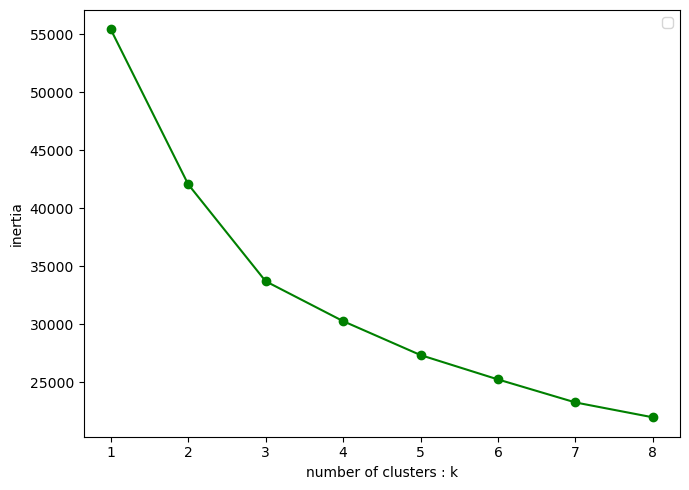

In [176]:
inertia_list = []
for k in range(1,9):
    kmeans_classifier = KMeans(n_clusters =k, random_state=3)
    y_kmeans = kmeans_classifier.fit_predict(X_transformed)
    inertia = kmeans_classifier.inertia_
    inertia_list.append(inertia)
    
fig,ax = plt. subplots (1, figsize =(7,5))
plt.plot (range(1, 9) , inertia_list, marker ='o',
color = 'green')
plt.legend()
plt.xlabel('number of clusters : k')
plt.ylabel('inertia')
plt.tight_layout()
plt.show()

In [177]:
kmeans = KMeans(n_clusters=3, init = 'random', random_state=3)
y_kmeans=kmeans.fit_predict(X_transformed)

In [178]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.87244319, -0.85389329, -0.36082683,  0.3287639 , -0.04888659,
         0.11102794,  0.59131737,  0.29765469],
       [ 0.85767858,  0.83477658, -0.38807743,  0.37187343,  0.03713032,
         0.09026007,  0.60326364,  0.30647629],
       [ 0.06422073,  0.07169592,  1.43392929, -1.34114652,  0.02430549,
         0.09855072,  0.61062802,  0.29082126]])

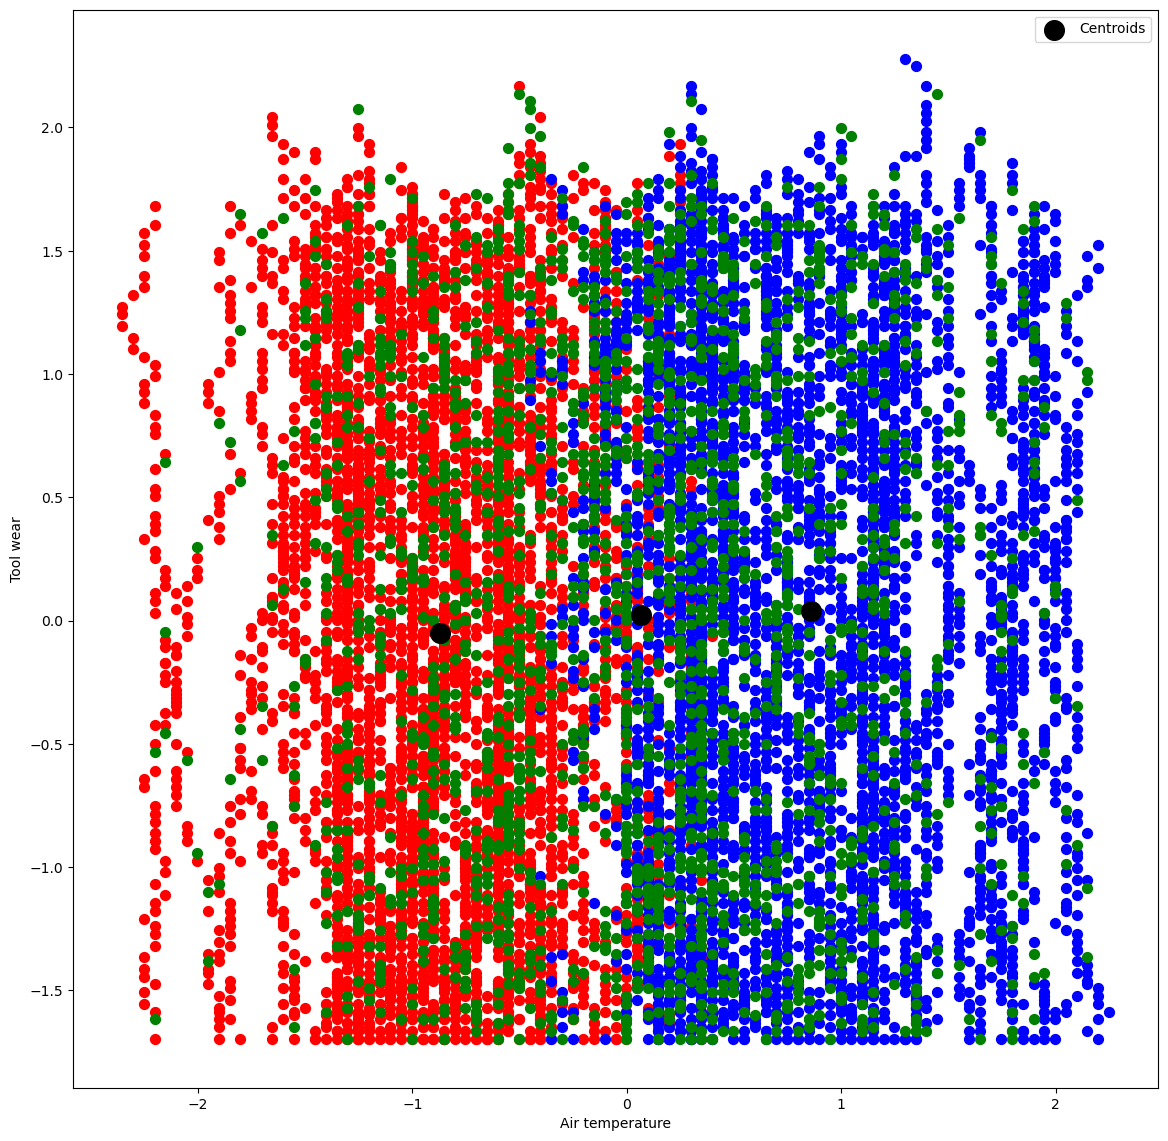

In [179]:
fig,ax = plt.subplots (1 , figsize =(14 ,14))
plt.scatter(X_transformed[y_kmeans ==0, 0] , X_transformed[y_kmeans == 0, 4] ,
s = 50 , c = 'red')

plt.scatter(X_transformed[y_kmeans == 1, 0] , X_transformed[y_kmeans == 1, 4] ,
s = 50 , c ='blue')

plt.scatter(X_transformed[y_kmeans == 2, 0] , X_transformed[y_kmeans == 2, 4] ,
s = 50 , c ='green')

plt.scatter(centroids[:, 0] , centroids[:, 4], s = 200, c = 'black', label ='Centroids')

x_label = 'Air temperature'
y_label = 'Tool wear'
plt.legend()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

In [180]:
df_cluster=df.copy()

In [181]:
df_cluster['Cluster']=y_kmeans

In [182]:
bar_df=df_cluster.groupby('Cluster')['Target'].value_counts(normalize=True).unstack()

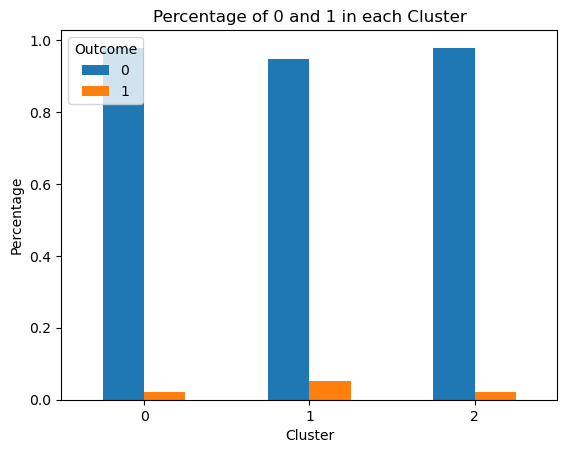

In [183]:
bar_df.plot(kind='bar', stacked=False)
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of 0 and 1 in each Cluster')
plt.xticks(rotation=0)
plt.legend(title='Outcome', loc='upper left')
plt.show()

# Results

In [184]:
data={
    'Model':['naive bayesian', 'logistic', 'decision tree', 'random forest', 'K-NN model k_13', 
              'Gaussian SVM', 'LDA', 'QDA', 'AdaBoost', 'XGBoost'],
    'TP':[cf_NB[1][1],cf_LR[1][1],cf_DT[1][1],cf_RF[1][1],cf_KNN[1][1],cf_SVM[1][1],cf_LDA[1][1], cf_QDA[1][1], cf_ADA[1][1],cf_XG[1][1]],
    'FP':[cf_NB[0][1],cf_LR[0][1],cf_DT[0][1],cf_RF[0][1],cf_KNN[0][1],cf_SVM[0][1],cf_LDA[0][1], cf_QDA[0][1], cf_ADA[0][1],cf_XG[0][1]],
    'TN':[cf_NB[0][0],cf_LR[0][0],cf_DT[0][0],cf_RF[0][0],cf_KNN[0][0],cf_SVM[0][0],cf_LDA[0][0], cf_QDA[0][0], cf_ADA[0][0],cf_XG[0][0]],
    'FN':[cf_NB[1][0],cf_LR[1][0],cf_DT[1][0],cf_RF[1][0],cf_KNN[1][0],cf_SVM[1][0],cf_LDA[1][0], cf_QDA[1][0], cf_ADA[1][0],cf_XG[1][0]],
    'accuracy':[accuracy_NB, accuracy_LR, accuracy_DT, accuracy_RF, accuracy_KNN,accuracy_rbf,
                accuracy_LDA, accuracy_QDA, accuracy_ADA, accuracy_XG]
    
}

In [185]:
df_summary=pd.DataFrame(data).set_index('Model')
df_summary['TPR']=df_summary['TP']/(df_summary['TP']+df_summary['FN'])
df_summary['TNR']=df_summary['TN']/(df_summary['TN']+df_summary['FP'])
df_summary['accuracy']=df_summary['accuracy'].round(2)
df_summary['TPR']=df_summary['TPR'].round(2)
df_summary['TNR']=df_summary['TNR'].round(2)

In [186]:
df_summary

,TP,FP,TN,FN,accuracy,TPR,TNR
Model,,,,,,,
naive bayesian,36,39,4798,127,0.97,0.22,0.99
logistic,30,11,4826,133,0.97,0.18,1.00
decision tree,100,42,4795,63,0.98,0.61,0.99
random forest,93,13,4824,70,0.98,0.57,1.00
K-NN model k_13,27,10,4827,136,0.97,0.17,1.00
Gaussian SVM,90,18,4819,73,0.98,0.55,1.00
LDA,60,40,4797,103,0.97,0.37,0.99
QDA,31,11,4826,132,0.97,0.19,1.00
AdaBoost,107,16,4821,56,0.99,0.66,1.00


In [187]:
feature_imp_df_RF

,Feature_importance,Column_Name
3,0.315828,Rotational speed [rpm]
2,0.224035,Process temperature [K]
4,0.157056,Torque [Nm]
0,0.151477,Type
1,0.127611,Air temperature [K]
5,0.005034,Tool wear [min]


In [188]:
feature_imp_df_LG

,Feature_importance,Column_Name
3,2.561496,Rotational speed [rpm]
2,1.869376,Process temperature [K]
0,1.516970,Type
4,0.698144,Torque [Nm]
1,-1.007482,Air temperature [K]
5,-1.517753,Tool wear [min]


In [189]:
feature_imp_df_DT

,Feature_importance,Column_Name
3,0.355000,Rotational speed [rpm]
2,0.215186,Process temperature [K]
0,0.173404,Type
4,0.165643,Torque [Nm]
1,0.076562,Air temperature [K]
5,0.000000,Tool wear [min]


In [190]:
feature_imp_df_AB

,Feature_importance,Column_Name
3,0.329015,Rotational speed [rpm]
4,0.208947,Torque [Nm]
2,0.172684,Process temperature [K]
0,0.146546,Type
1,0.123758,Air temperature [K]
5,0.002858,Tool wear [min]


In [191]:
feature_imp_df_XG

,Feature_importance,Column_Name
3,0.300061,Rotational speed [rpm]
0,0.170826,Type
4,0.131200,Torque [Nm]
2,0.122933,Process temperature [K]
1,0.099859,Air temperature [K]
5,0.031312,Tool wear [min]


# Results of Failure Type Prediction

In [192]:
data_1={
    'Model':['naive bayesian', 'logistic', 'random forest', 'AdaBoost', 'XGBoost'],
    'accuracy':[accuracy_NNB, accuracy_NLR, accuracy_NRF, accuracy_NAB, accuracy_NXG]    
}

In [193]:
df_failure_summary=pd.DataFrame(data_1).set_index('Model')

In [194]:
df_failure_summary

,accuracy
Model,
naive bayesian,0.9516
logistic,0.9812
random forest,0.9808
AdaBoost,0.9798
XGBoost,0.9838


In [195]:
conf_matrix_NNB

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,23,19,5,0,0,0
No Failure,82,4679,29,42,0,2
Overstrain Failure,1,6,38,0,0,0
Power Failure,6,18,5,18,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,20,0,0,0,0


In [196]:
conf_matrix_NLR

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,26,18,3,0,0,0
No Failure,13,4812,2,6,0,1
Overstrain Failure,0,11,34,0,0,0
Power Failure,1,6,6,34,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,19,1,0,0,0


In [197]:
conf_matrix_NRF

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,22,20,4,1,0,0
No Failure,1,4828,2,3,0,0
Overstrain Failure,0,23,22,0,0,0
Power Failure,1,12,2,32,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,20,0,0,0,0


In [198]:
conf_matrix_NAB

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,22,20,4,1,0,0
No Failure,2,4826,1,5,0,0
Overstrain Failure,0,24,21,0,0,0
Power Failure,1,14,2,30,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,20,0,0,0,0


In [199]:
conf_matrix_NXG

,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Heat Dissipation Failure,34,8,4,0,0,1
No Failure,4,4816,7,6,1,0
Overstrain Failure,1,10,34,0,0,0
Power Failure,2,8,2,35,0,0
Random Failures,0,7,0,0,0,0
Tool Wear Failure,0,19,1,0,0,0


In [200]:
feature_imp_df_NRF

,Feature_importance,Column_Name
3,0.281549,Rotational speed [rpm]
2,0.233290,Process temperature [K]
4,0.199051,Torque [Nm]
0,0.148997,Type
1,0.110868,Air temperature [K]
5,0.004920,Tool wear [min]


In [201]:
feature_imp_df_NLG

,Feature_importance,Column_Name
0,7.910659,Type
5,0.692992,Tool wear [min]
3,-2.619535,Rotational speed [rpm]
4,-2.732763,Torque [Nm]
1,-5.498331,Air temperature [K]
2,-6.738190,Process temperature [K]


In [202]:
feature_imp_df_NAB

,Feature_importance,Column_Name
3,0.270914,Rotational speed [rpm]
2,0.245492,Process temperature [K]
4,0.193578,Torque [Nm]
0,0.153775,Type
1,0.109238,Air temperature [K]
5,0.005315,Tool wear [min]


In [203]:
feature_imp_df_NXG

,Feature_importance,Column_Name
3,0.219603,Rotational speed [rpm]
0,0.188706,Type
2,0.167476,Process temperature [K]
4,0.149932,Torque [Nm]
1,0.114021,Air temperature [K]
5,0.021032,Tool wear [min]
